In [8]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('MCXstyle.mplstyle')

# Comparison of circuit depths for methods involving a single or no ancilla

In [9]:
xrange = np.load('data/x_axis.npy')
silva_range = np.load('data/silva_range.npy')
silva_depth = [3610, 5044, 5716, 6530, 7796, 9788, 12399, 15932, 20540, 26684, 34799, 45628, 59964, 78908, 104047, 137404, 181615, 240239, 317935, 420975, 557551, 738543, 978620, 1296751, 1718588, 2277820, 3019196]
while xrange[4+len(silva_depth)-1] != 10**7:
    silva_depth.append((silva_depth[-1]-silva_depth[-2])/(xrange[4+len(silva_depth)-1]-xrange[4+len(silva_depth)-2])*(xrange[4+len(silva_depth)]-xrange[3+len(silva_depth)])+silva_depth[-1])
barenco_one_depth = np.load('data/barenco_one_depth.npy')
gidney_depth = np.load('data/gidney_depth.npy')
log3_depth = np.load('data/log3_depth.npy')
k = np.ceil(np.log2(np.pi/1e-7))
log3_approx_depth = [1984, 4074, 8116, 16726, 30576, 53044, 80462, 105854, 135536, 171302, 209168, 254228, 299770, 369074, 414580, 489554, 548154, 617850, 720250, 774638, 912350, 954410, 1093050, 1188350, 1322050]
log3_approx_depth = log3_approx_depth + [1479250, 1628550, 1708050, 1940950, 2096450, 2264750, 2444250, 2603250, 2997350, 3186950]
while len(log3_approx_depth) < len(xrange):
    l = len(log3_approx_depth)
    log3_approx_depth.append(k*(2*(log3_depth[l]+5-20*np.log2(np.floor(np.sqrt(xrange[l])))**3)))

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


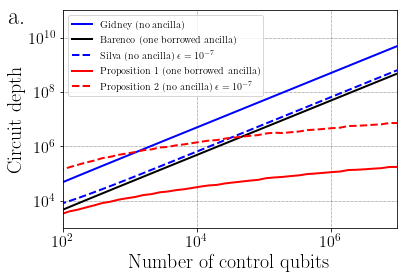

In [3]:
plt.figure()
plt.loglog(xrange, gidney_depth, 'b', label=r'Gidney (no ancilla)')
plt.loglog(xrange, barenco_one_depth, 'k', label='Barenco (one borrowed ancilla)')
plt.loglog(xrange[4:4+len(silva_depth)], silva_depth, 'b--', label=r'Silva (no ancilla) $\epsilon=10^{-7}$')
plt.loglog(xrange, log3_depth, 'r', label='Proposition 1 (one borrowed ancilla)')
plt.loglog(xrange[:len(log3_approx_depth)], log3_approx_depth, 'r--', label=r'Proposition 2 (no ancilla) $\epsilon=10^{-7}$')
plt.legend()
plt.xlabel('Number of control qubits')
plt.ylabel('Circuit depth')
plt.xlim((10**2, 10**7))
plt.ylim((10**3, 10**11))
plt.text(15.5, 3.5*10**10, 'a.', fontweight=1000, fontsize=24)
plt.savefig('figures/circuit_depth.pdf', bbox_inches='tight')

# Fit

In [4]:
xdata = [np.log(n)**3 for n in xrange]
fit = np.polyfit(xdata, log3_depth, 1)
print(fit)

[   43.02638831 -1287.18689503]


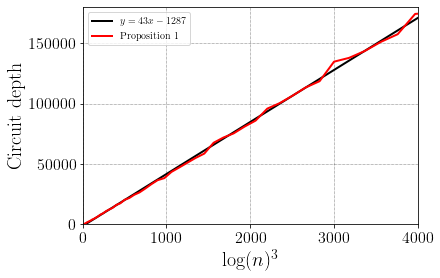

In [5]:
plt.figure()
plt.plot(xdata, np.polyval(fit, xdata), 'k', label=r'$y=43x-1287$')
plt.plot(xdata, log3_depth, 'r',label='Proposition 1')
plt.legend()
plt.xlabel(r'$\log(n)^3$')
plt.ylabel('Circuit depth')
plt.xlim(0, 4000)
plt.ylim(0, 180000)
plt.savefig('figures/fit.pdf', bbox_inches='tight')

# Ancillae 100

[2586. 2586. 2586. 2586. 2586. 2110. 1919. 1764. 1439. 1359. 1263. 1167.
  928.  891.  832.  795.  736.  736.  715.  715.  656.  656.  467.  467.
  467.  414.  414.  414.  377.  377.  377.  377.  377.  346.  346.  346.
  346.  346.  346.  346.  242.  242.  242.  242.  242.  242.  242.  242.
  242.  242.  168.  168.  168.  168.  168.  168.  168.  168.  168.  168.
  168.  168.  168.  168.  168.  168.  152.  152.  152.  152.  152.  152.
  152.  152.  152.  152.  152.  152.  152.  152.  152.  152.  152.  152.
  152.  152.  152.  152.  152.  152.  152.  152.  152.  152.  152.  152.
  152.  152.  152.  124.]


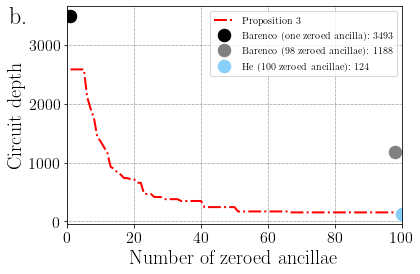

In [6]:
nc = 100
ms = 25
depth_one_clean_ancilla, depth_v_chain, depth_he = 3489, 1188, 124
our_depth = np.load('data/ancillae_100.npy')
print(our_depth)
plt.figure()
plt.plot(list(range(1, nc+1)), our_depth, 'r-.', label='Proposition 3')
plt.plot(1, depth_one_clean_ancilla, '.k', markersize=ms, label=r'Barenco (one zeroed ancilla): $3493$')
plt.plot(98, depth_v_chain, '.', color='grey', markersize=ms, label=r'Barenco ($98$ zeroed ancillae): $1188$')
plt.plot(100, depth_he, '.', color='lightskyblue', markersize=ms, label=r'He ($100$ zeroed ancillae): $124$')
plt.xlim((0,100))
plt.xlabel('Number of zeroed ancillae')
plt.ylabel('Circuit depth')
plt.legend()
plt.text(-17.5, 3370, 'b.', fontweight=1000, fontsize=24)
plt.savefig('figures/depth_vs_ancillae_nc100.pdf', bbox_inches='tight')

# Ancillae 10**5

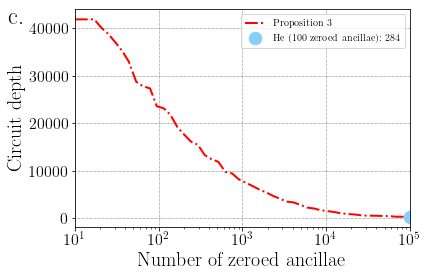

In [7]:
nc = 10**5
ms = 25
depth_he = 284
krange = [int(k) for k in list(np.logspace(1, 5, 50))]
our_depth = np.load('data/ancillae_100000.npy')
plt.figure()
plt.semilogx(krange, our_depth[1:-1], 'r-.', label='Proposition 3')
plt.plot(10**5, depth_he, '.', color='lightskyblue', markersize=ms, label=r'He ($100$ zeroed ancillae): $284$')
plt.xlim((10,10**5))
plt.xlabel('Number of zeroed ancillae')
plt.ylabel('Circuit depth')
plt.legend()
plt.text(1.6, 41000, 'c.', fontweight=1000, fontsize=24)
plt.savefig('figures/depth_vs_ancillae_nc100000.pdf', bbox_inches='tight')

# Combining subfigures

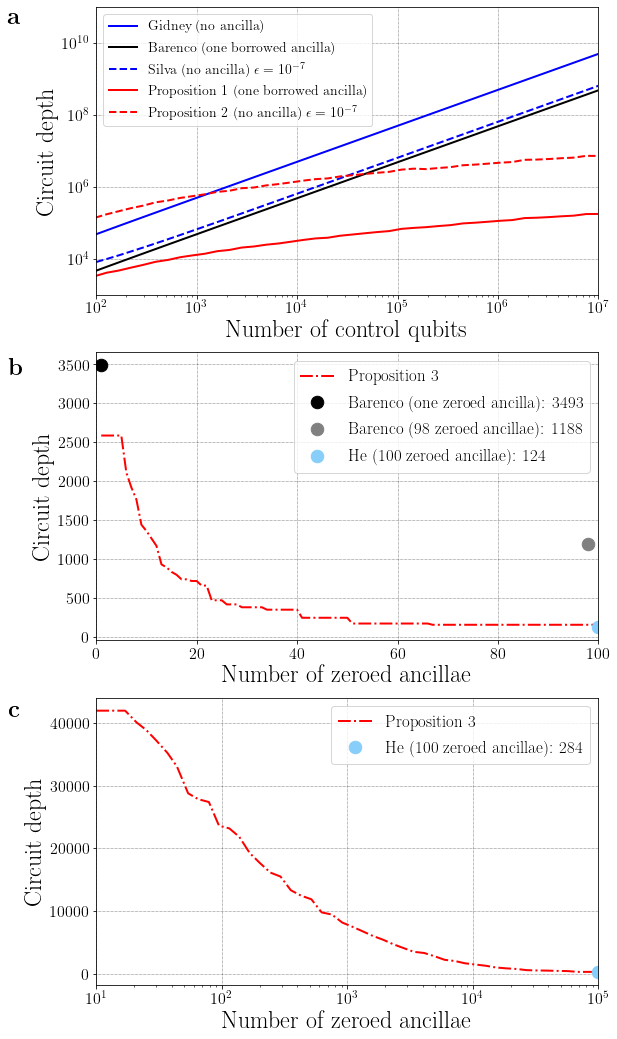

In [87]:
legend_size = 14; fs=24
xrange = np.load('data/x_axis.npy')
silva_range = np.load('data/silva_range.npy')
silva_depth = [3610, 5044, 5716, 6530, 7796, 9788, 12399, 15932, 20540, 26684, 34799, 45628, 59964, 78908, 104047, 137404, 181615, 240239, 317935, 420975, 557551, 738543, 978620, 1296751, 1718588, 2277820, 3019196]
while xrange[4+len(silva_depth)-1] != 10**7:
    silva_depth.append((silva_depth[-1]-silva_depth[-2])/(xrange[4+len(silva_depth)-1]-xrange[4+len(silva_depth)-2])*(xrange[4+len(silva_depth)]-xrange[3+len(silva_depth)])+silva_depth[-1])
barenco_one_depth = np.load('data/barenco_one_depth.npy')
gidney_depth = np.load('data/gidney_depth.npy')
log3_depth = np.load('data/log3_depth.npy')
k = np.ceil(np.log2(np.pi/1e-7))
log3_approx_depth = [1984, 4074, 8116, 16726, 30576, 53044, 80462, 105854, 135536, 171302, 209168, 254228, 299770, 369074, 414580, 489554, 548154, 617850, 720250, 774638, 912350, 954410, 1093050, 1188350, 1322050]
log3_approx_depth = log3_approx_depth + [1479250, 1628550, 1708050, 1940950, 2096450, 2264750, 2444250, 2603250, 2997350, 3186950]
while len(log3_approx_depth) < len(xrange):
    l = len(log3_approx_depth)
    log3_approx_depth.append(k*(2*(log3_depth[l]+5-20*np.log2(np.floor(np.sqrt(xrange[l])))**3)))
plt.figure(figsize=(9,18))
plt.subplot(3, 1, 1)
plt.loglog(xrange, gidney_depth, 'b', label=r'Gidney (no ancilla)')
plt.loglog(xrange, barenco_one_depth, 'k', label='Barenco (one borrowed ancilla)')
plt.loglog(xrange[4:4+len(silva_depth)], silva_depth, 'b--', label=r'Silva (no ancilla) $\epsilon=10^{-7}$')
plt.loglog(xrange, log3_depth, 'r', label='Proposition 1 (one borrowed ancilla)')
plt.loglog(xrange[:len(log3_approx_depth)], log3_approx_depth, 'r--', label=r'Proposition 2 (no ancilla) $\epsilon=10^{-7}$')
plt.legend(prop={'size': legend_size})
plt.xlabel('Number of control qubits', fontsize=fs)
plt.ylabel('Circuit depth', fontsize=fs)
plt.xlim((10**2, 10**7))
plt.ylim((10**3, 10**11))
plt.text(13, 3.5*10**10, r"$\mathbf{a}$", fontweight=1000, fontsize=24)
plt.subplot(3, 1, 2)
nc = 100
ms = 25
depth_one_clean_ancilla, depth_v_chain, depth_he = 3489, 1188, 124
our_depth = np.load('data/ancillae_100.npy')
plt.plot(list(range(1, nc+1)), our_depth, 'r-.', label='Proposition 3')
plt.plot(1, depth_one_clean_ancilla, '.k', markersize=ms, label=r'Barenco (one zeroed ancilla): $3493$')
plt.plot(98, depth_v_chain, '.', color='grey', markersize=ms, label=r'Barenco ($98$ zeroed ancillae): $1188$')
plt.plot(100, depth_he, '.', color='lightskyblue', markersize=ms, label=r'He ($100$ zeroed ancillae): $124$')
plt.xlim((0,100))
plt.xlabel('Number of zeroed ancillae', fontsize=fs)
plt.ylabel('Circuit depth', fontsize=fs)
plt.legend(prop={'size': legend_size+3})
plt.text(-17.5, 3370, r"$\mathbf{b}$", weight=1000, fontsize=24)
plt.subplot(3, 1, 3)
nc = 10**5
ms = 25
depth_he = 284
krange = [int(k) for k in list(np.logspace(1, 5, 50))]
our_depth = np.load('data/ancillae_100000.npy')
plt.semilogx(krange, our_depth[1:-1], 'r-.', label='Proposition 3')
plt.plot(10**5, depth_he, '.', color='lightskyblue', markersize=ms, label=r'He ($100$ zeroed ancillae): $284$')
plt.xlim((10,10**5))
plt.xlabel('Number of zeroed ancillae', fontsize=fs)
plt.ylabel('Circuit depth', fontsize=fs)
plt.legend(prop={'size': legend_size+3})
plt.text(2., 41000, r"$\mathbf{c}$", weight='bold', fontsize=24)
plt.savefig('figures/circuit_depth_combined.pdf', bbox_inches='tight')